In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import sys
# Gloabl seaborn Theme
sns.set_theme(style="whitegrid", palette="pastel")

# Extraction

In [2]:
# Kedro Catalog
pm25 = catalog.load('pm25')

2022-09-06 12:21:22,384 - kedro.io.data_catalog - INFO - Loading data from `pm25` (CSVDataSet)...


In [3]:
# PM25 without Outliers
pm25.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE,DATE,TIME,WEEKDAY,MONTH,YEAR
0,2022-09-04 00:00:00-05:00,5.0,NaN,4.0,7.0,NaN,NaN,NaN,0.0,0.0,0.0,4.0,1.0,NaN,09/04/22,00:00:00,Sunday,September,2022
1,2022-09-04 00:00:30-05:00,6.0,5.0,4.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0,09/04/22,00:00:30,Sunday,September,2022
2,2022-09-04 00:01:00-05:00,5.0,7.0,4.0,7.0,8.0,7.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,09/04/22,00:01:00,Sunday,September,2022
3,2022-09-04 00:01:30-05:00,6.0,7.0,4.0,7.0,8.0,8.0,3.0,0.0,0.0,0.0,3.0,1.0,6.0,09/04/22,00:01:30,Sunday,September,2022
4,2022-09-04 00:02:00-05:00,6.0,8.0,4.0,7.0,9.0,8.0,5.0,0.0,2.0,0.0,4.0,1.0,6.0,09/04/22,00:02:00,Sunday,September,2022


# Resample by Hour

In [4]:
# Add DateTime string values to PM25 Data Sensors
def add_datetime_str_values(data_sensors):
    # Date value string
    data_sensors['DATE'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%x'))
    # Time value string
    data_sensors['TIME'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%T'))
    # Weekday value string
    data_sensors['WEEKDAY'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%A'))
    # Month value string
    data_sensors['MONTH'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%B'))
    # Year value string
    data_sensors['YEAR'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%Y'))
    
    return data_sensors

In [5]:
# Get data_sensors resample mean by hour
def resample_pm25_by_hour(data_sensors):
    # Timestamp Format
    data_sensors['DATETIME'] = pd.to_datetime(data_sensors['DATETIME'])
    pm25_by_hour = data_sensors.resample('H', on='DATETIME').mean().reset_index()#.median().reset_index()
    return add_datetime_str_values(pm25_by_hour)

In [6]:
# Resample mean by Hour
pm25_by_hour = resample_pm25_by_hour(pm25)
pm25_by_hour.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE,YEAR,DATE,TIME,WEEKDAY,MONTH
0,2022-09-04 00:00:00-05:00,5.521739,7.274336,4.885965,8.637168,7.526786,8.830357,4.690265,0.053097,0.495413,0.275229,6.456140,1.046729,8.789474,2022,09/04/22,00:00:00,Sunday,September
1,2022-09-04 01:00:00-05:00,4.700000,7.243697,4.741667,7.915254,7.974790,7.591667,3.200000,0.050420,0.339130,0.087719,6.370690,1.025641,7.191667,2022,09/04/22,01:00:00,Sunday,September
2,2022-09-04 02:00:00-05:00,6.108333,6.478992,5.436975,7.798319,6.546218,6.941176,5.881356,0.508333,1.954955,1.266667,5.205128,2.100000,7.525000,2022,09/04/22,02:00:00,Sunday,September
3,2022-09-04 03:00:00-05:00,5.705882,6.457627,6.932203,8.093220,6.406780,6.601695,5.338983,0.085470,0.495495,0.288136,4.991453,1.305085,6.815126,2022,09/04/22,03:00:00,Sunday,September
4,2022-09-04 04:00:00-05:00,5.601695,6.681034,7.145299,9.290598,5.657895,6.035088,6.698276,0.000000,0.149123,0.000000,6.666667,0.949153,6.551724,2022,09/04/22,04:00:00,Sunday,September


In [7]:
# Describe Data
pm25_by_hour.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,24.000000,24.000000,15.000000,24.000000,24.000000,23.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,10.256675,13.020907,6.973660,15.833413,13.432835,10.879583,7.213938,1.919017,5.448853,10.046777,10.288728,7.286368,11.841077
std,5.693249,8.381659,2.012726,9.722718,8.638477,5.799017,2.223319,1.281199,3.545214,7.338819,3.941199,4.413051,6.147502
min,4.700000,4.833333,4.741667,6.313559,5.200000,5.428571,3.200000,0.000000,0.149123,0.000000,4.991453,0.949153,6.318966
25%,6.170222,6.473650,5.239496,8.075139,6.882062,6.907029,5.422932,0.475788,2.008828,2.030952,6.614035,2.358333,7.538578
50%,7.675000,7.760684,6.932203,9.703470,9.783626,8.830357,6.656155,1.974138,5.595011,9.653884,9.745465,7.492561,9.076271
75%,11.888633,19.807446,7.688697,24.974543,21.943478,14.051122,8.842796,3.050936,8.216610,15.779054,13.339130,10.726282,13.496282
max,21.847826,28.563025,12.000000,35.222222,33.097826,24.114286,12.214286,3.821429,12.276786,22.546218,18.692308,14.178571,25.297297


In [8]:
# Plot Histograms
def histplots(data_sensors):
    # Canvas
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)
    fig.suptitle('Histograms - Data Sensors', fontsize=20)
    # Plot
    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.histplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]])
            k += 1

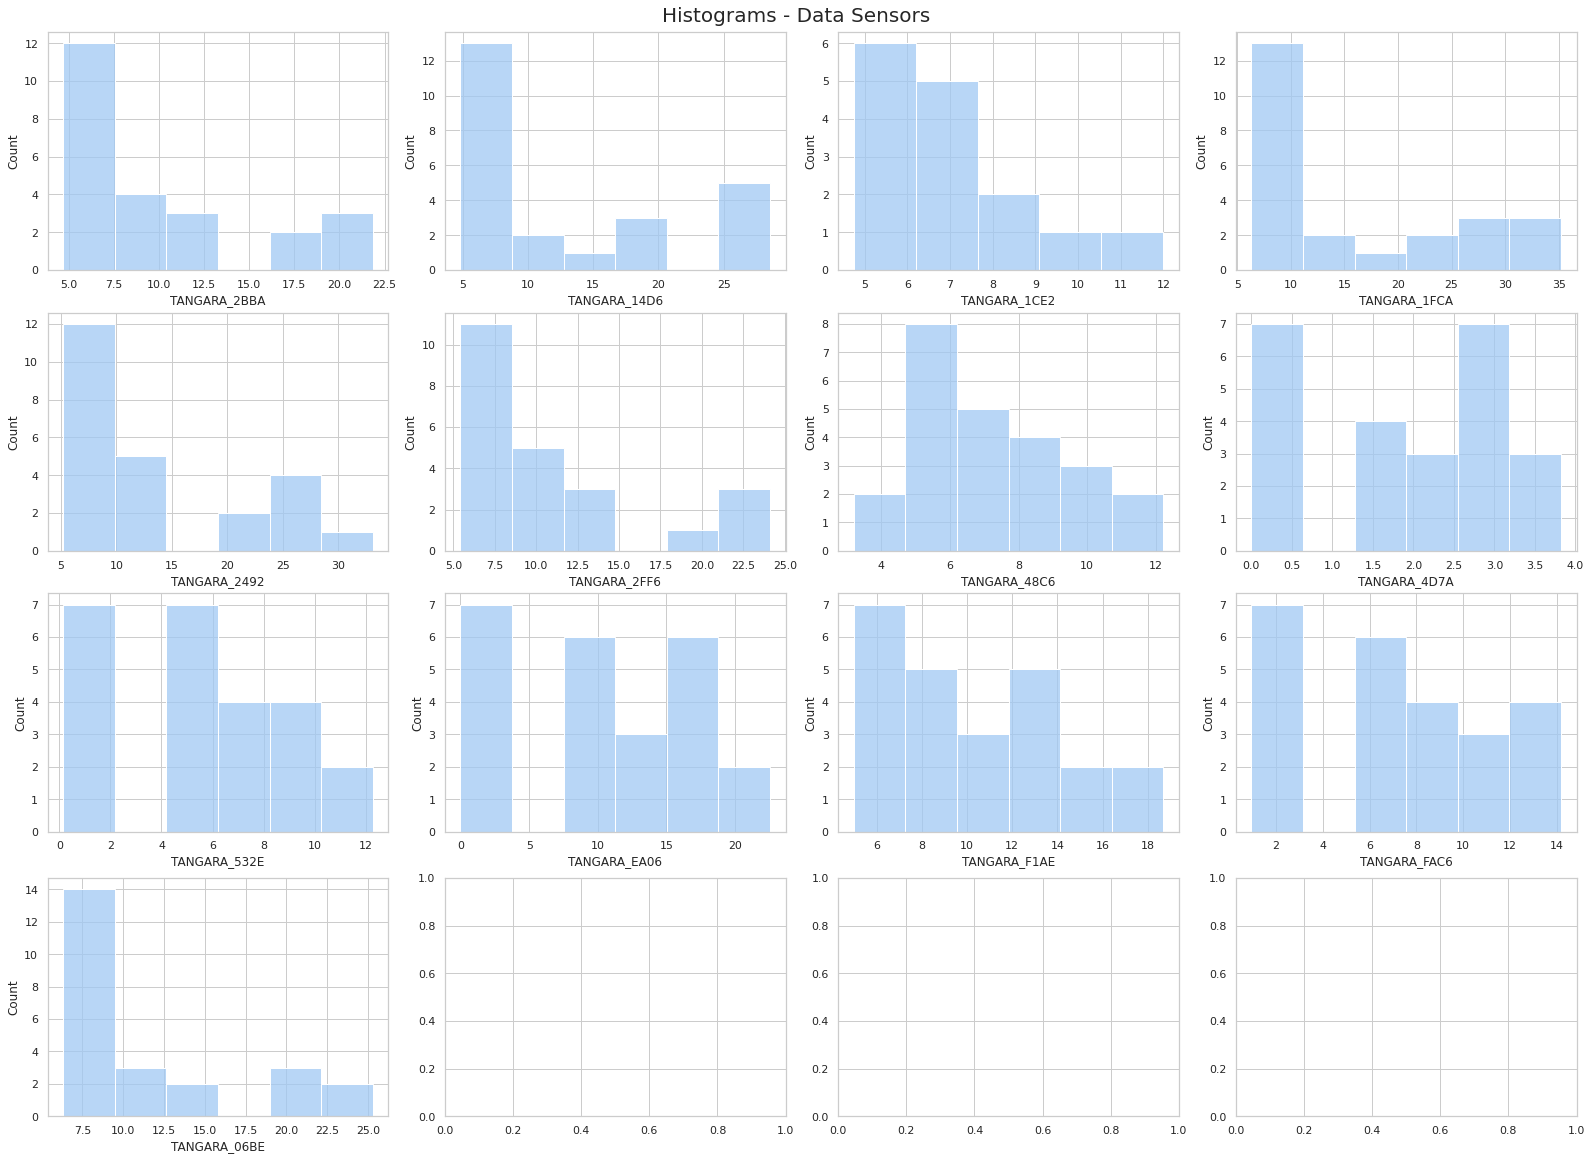

In [9]:
# Plot Histogramas
histplots(pm25_by_hour)

In [10]:
# Plot Boxplots
def boxplots(data_sensors):
    # Canvas
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)
    fig.suptitle('Boxplots - Data Sensors', fontsize=20)
    # Plot
    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.boxplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]], orient="h", x=data_sensors[data_sensors.columns[k]])
            k += 1

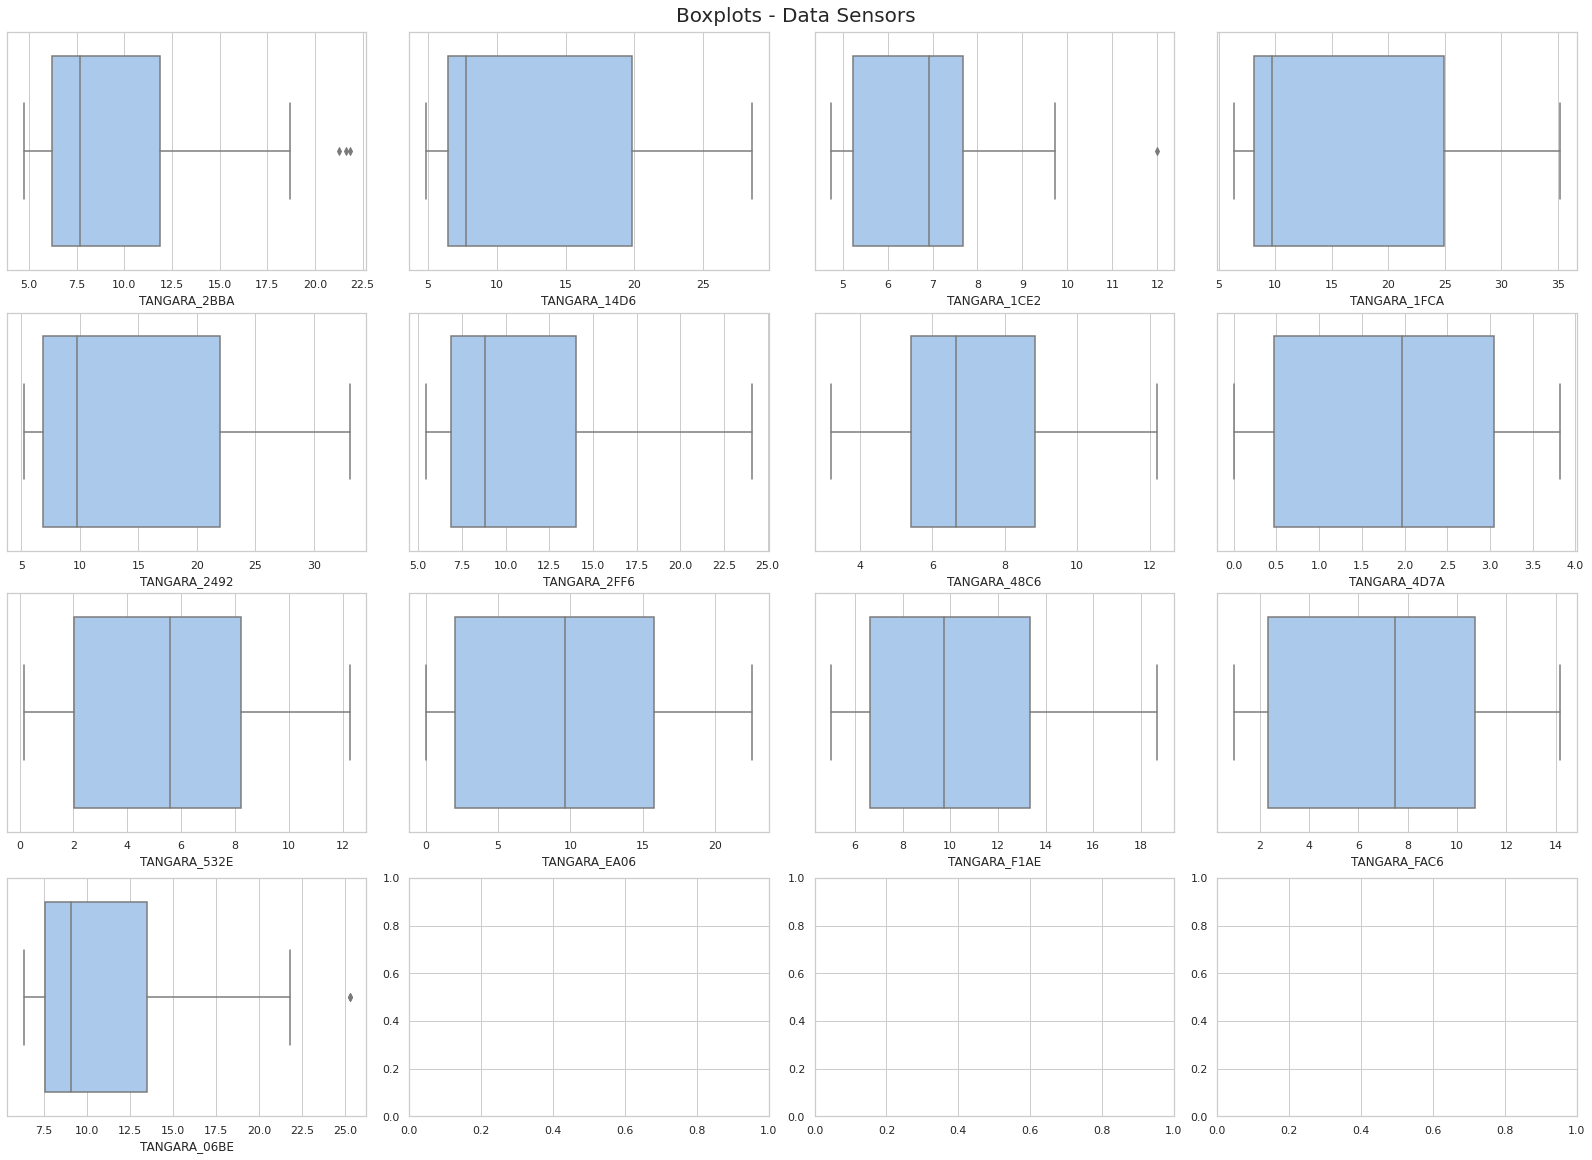

In [11]:
# Plot Boxplots
boxplots(pm25_by_hour)

In [12]:
# Plot Lineplots
def lineplots(data_sensors):
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)

    fig.suptitle('Timeline - Data Sensors', fontsize=20)

    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.lineplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]])
            k += 1

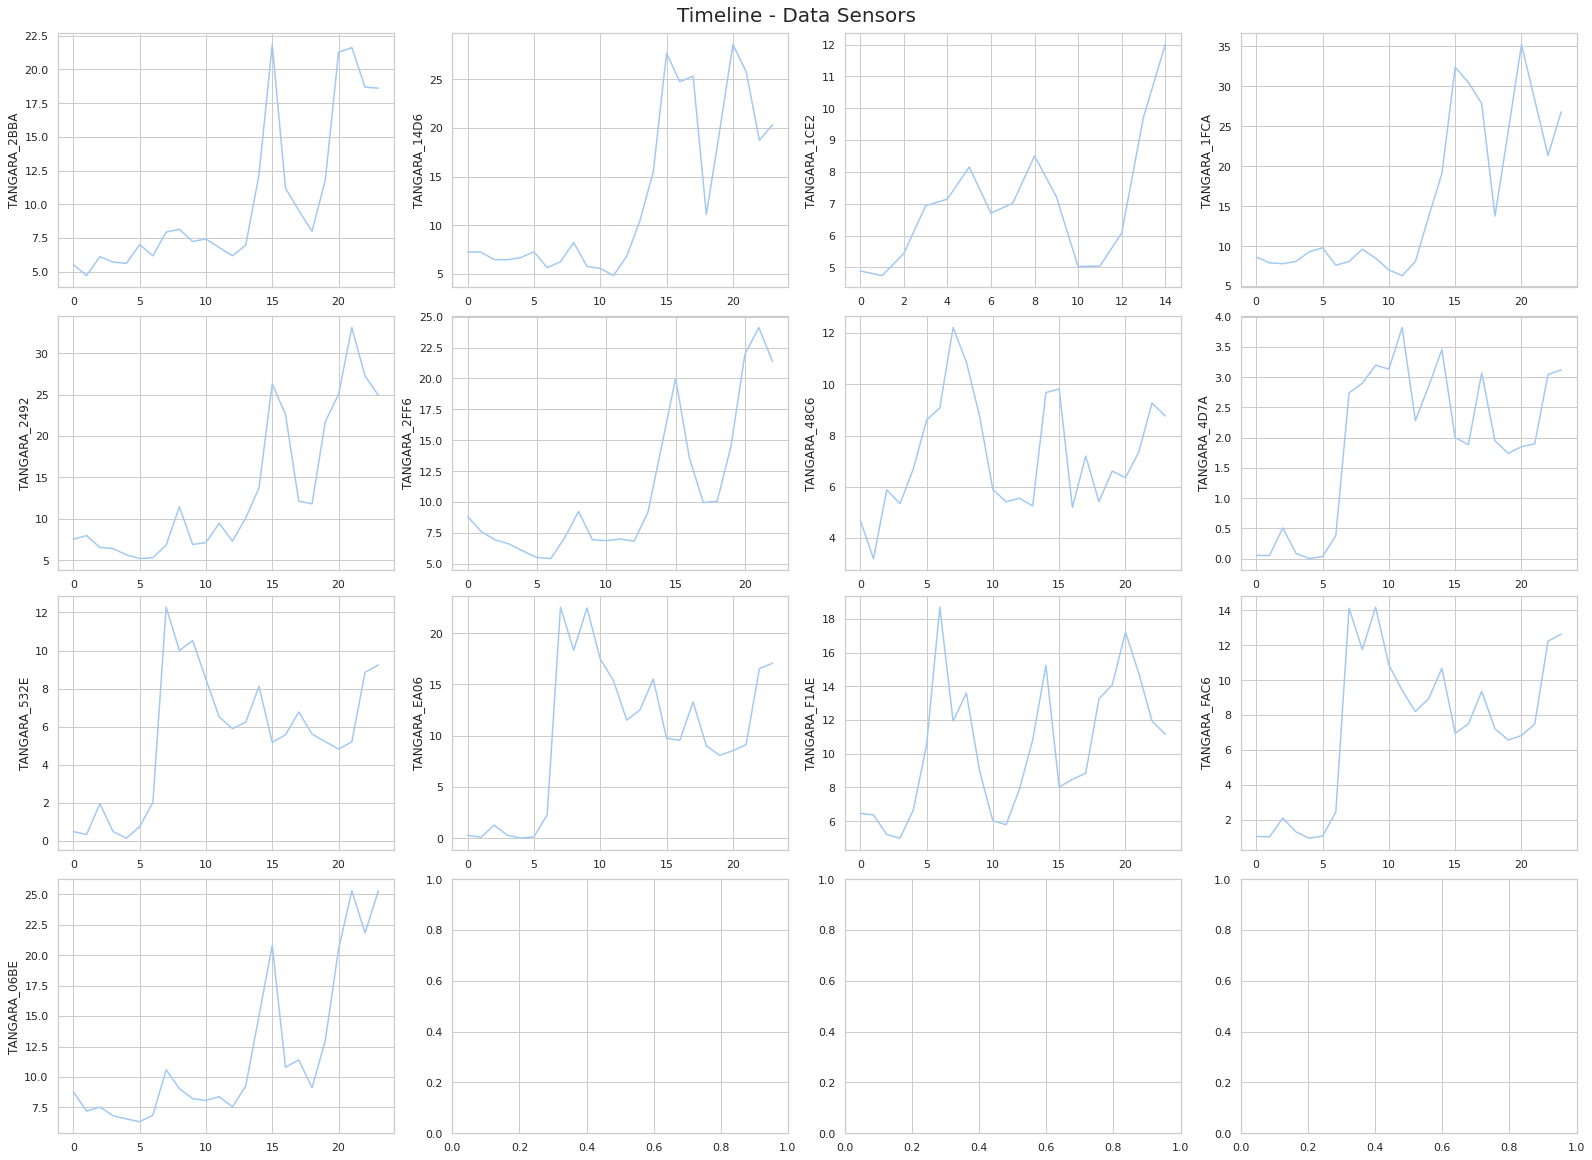

In [13]:
# Plot Lineplots
lineplots(pm25_by_hour)

In [14]:
# Save pm25_by_hour into Catalog
catalog.save('pm25_by_hour', pm25_by_hour)

2022-09-06 12:21:47,761 - kedro.io.data_catalog - INFO - Saving data to `pm25_by_hour` (CSVDataSet)...
